# Data Analysis

This notebook performs the following steps:
1. Data analysis of HGG DB
2. Data analysis of PLGG in relation to HGG
3. Data analysis of both DBs

1. Data analysis of HGG DB:
The goal is to understand the main characteristics of HGG tumor.


In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

# Set basic plot parameters
plt.rcParams['figure.figsize'] = (10, 6)

# Load the cleaned dataset
df = pd.read_csv('../data/processed/HGG_DB_cleaned.csv')

# Display a preview to confirm loading
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
       sample dipgnbshgg location tumor_grade 3_yrs  acvr1  histone3    atrx  \
0  SJHGG059_A       DIPG  midline          IV    No  G328V       NaN     NaN   
1  SJHGG064_A       DIPG  midline          IV    No  G328W       NaN     NaN   
2  SJHGG071_A       DIPG  midline         NaN    No  G328E       NaN  T1610R   
3  SJHGG005_A       DIPG  midline          IV    No  G328V       NaN     NaN   
4  SJHGG106_A       DIPG  midline          IV    No  R258G  H3.1K27M     NaN   

  bcor bcorl1  ... ntrk123 egfr  pik3ca       pik3r1 braf  nf1 ccnd123cdk46  \
0  NaN    NaN  ...     NaN  NaN   E545K  T576_R577>R  NaN  NaN          NaN   
1  NaN    NaN  ...     NaN  NaN  H1047R          NaN  NaN  NaN          NaN   
2  NaN    NaN  ...     NaN  NaN   E545K          NaN  NaN  NaN          NaN   
3  NaN    NaN  ...     NaN  NaN     NaN          NaN  NaN  NaN          NaN   
4  NaN    NaN  ...     NaN  NaN  H1047R          NaN  NaN  NaN          NaN   

 

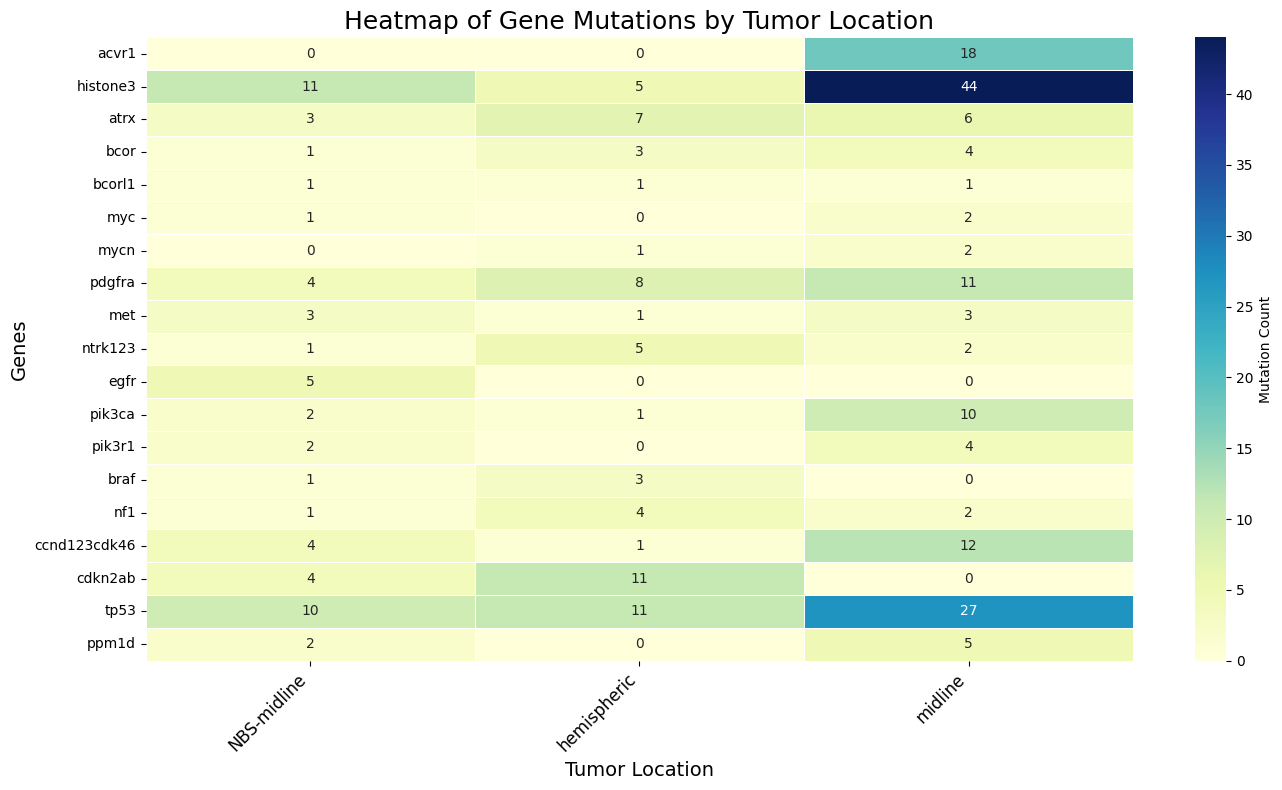

Top 5 Genes with Most Mutations by Tumor Location:


location,NBS-midline,hemispheric,midline
acvr1,0,0,18
atrx,0,7,0
ccnd123cdk46,4,0,12
cdkn2ab,0,11,0
egfr,5,0,0
histone3,11,5,44
pdgfra,4,8,11
tp53,10,11,27


Top genes per location saved to ../data/processed/HGG_top_genes_by_location.csv


In [22]:
# Load our cleaned dataset
data = pd.read_csv('../data/processed/HGG_DB_cleaned.csv')  

# Preprocess the data: Count mutations per gene for each location
mutation_columns = data.columns[5:]  # Assuming mutation columns start from index 5
data["Total Mutations"] = data[mutation_columns].notna().sum(axis=1)  # Count non-NaN values for mutations

# Group by location and calculate mutation counts for each gene
mutation_by_location = data.groupby("location")[mutation_columns].apply(lambda x: x.notna().sum()).T

# Create a heatmap of mutation counts by location and gene
plt.figure(figsize=(14, 8))
sns.heatmap(
    mutation_by_location,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Mutation Count"}
)

# Customize the plot
plt.title("Heatmap of Gene Mutations by Tumor Location", fontsize=18)
plt.xlabel("Tumor Location", fontsize=14)
plt.ylabel("Genes", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=10)

# Save the plot as a high-resolution PNG
output_path = "heatmap_gene_mutations_by_location.png"  # Specify your desired save path
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Find the top 5 genes with the most mutations for each tumor location
top_genes_per_location = (
    mutation_by_location
    .apply(lambda x: x.nlargest(5))  # Select the top 5 genes for each location
    .fillna(0)  # Fill missing values with 0 for better display
    .astype(int)  # Convert to integer for readability
)

# Display the top genes
print("Top 5 Genes with Most Mutations by Tumor Location:")
display(top_genes_per_location)  # Use this in Jupyter for better table display

# Save the top genes table to a CSV file
top_genes_output_path = "../data/processed/HGG_top_genes_by_location.csv"
top_genes_per_location.to_csv(top_genes_output_path)
print(f"Top genes per location saved to {top_genes_output_path}")



B.Classification of HGG genes
We wanted to know if the genes can be listed or grouped into potential functional or biological classes based on their roles in pathways or processes. so we looked at the litreture and found that the genes are classified into some classes: